In [1]:
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
import pywt

In [2]:
img=cv2.imread("./test_images/sharapova1.jpg")
img.shape

(555, 700, 3)

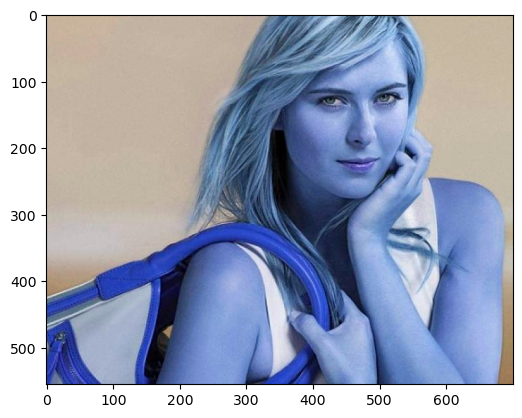

In [3]:
plt.imshow(img)

In [4]:
gray_img=cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
gray_img.shape

(555, 700)

In [5]:
gray_img

array([[183, 183, 183, ..., 183, 182, 181],
       [183, 183, 183, ..., 184, 182, 181],
       [183, 183, 183, ..., 184, 183, 181],
       ...,
       [ 60,  62,  63, ..., 126, 126, 126],
       [ 64,  64,  65, ..., 126, 126, 126],
       [ 69,  66,  66, ..., 125, 125, 125]], dtype=uint8)

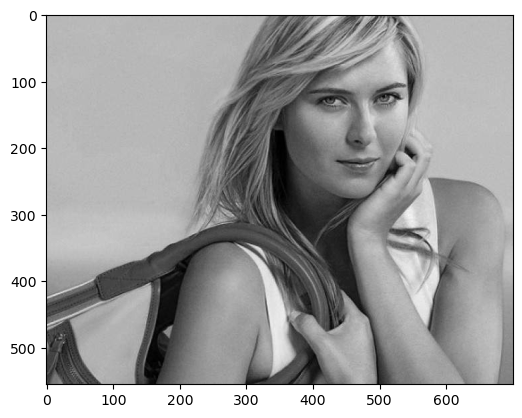

In [6]:
plt.imshow(gray_img,cmap="gray")

In [7]:
# Detect Face
face_cascade=cv2.CascadeClassifier("./opencv/haarcascades/haarcascade_frontalface_default.xml")
eye_cascade=cv2.CascadeClassifier("./opencv/haarcascades/haarcascade_eye.xml")
faces=face_cascade.detectMultiScale(gray_img,1.3,5)
faces

array([[356,  37, 233, 233]])

In [8]:
(x,y,w,h)=faces[0]
x,y,w,h

(356, 37, 233, 233)

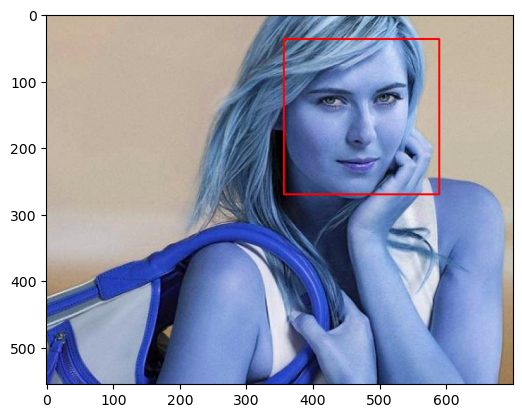

In [9]:
face_img=cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(face_img)

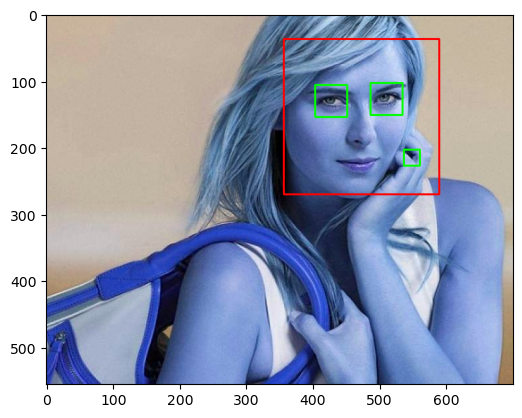

In [10]:
for (x,y,w,h) in faces:
    face_img=cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray=gray_img[y:y+h,x:x+w]
    roi_color=face_img[y:y+h,x:x+w]
    eyes=eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
plt.figure()
plt.imshow(face_img,cmap="gray")
plt.show()

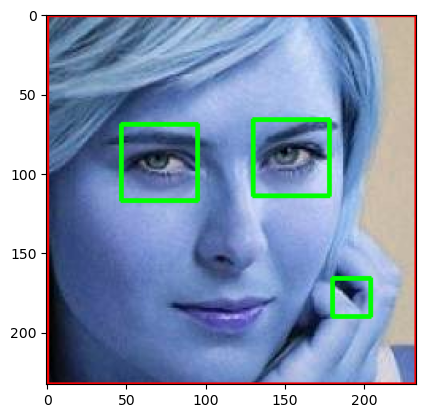

In [11]:
%matplotlib inline
plt.imshow(roi_color,cmap="gray")

In [12]:
def get_cropped_image_if2_eyes(image_path):
    img=cv2.imread(image_path)
    gray=cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
    faces=face_cascade.detectMultiScale(gray,1.3,5)
    for (x,y,w,h) in faces:
        roi_gray=gray[y:y+h,x:x+w]
        roi_color=img[y:y+h,x:x+w]
        eyes=eye_cascade.detectMultiScale(roi_gray)
        if len(eyes)>=2:
            return roi_color
    

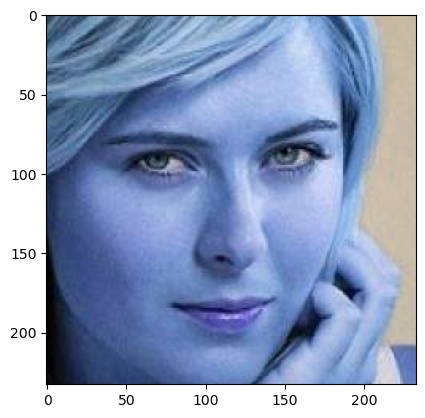

In [13]:
cropped_img=get_cropped_image_if2_eyes("./test_images/sharapova1.jpg")
plt.imshow(cropped_img)

In [14]:
cropped2=get_cropped_image_if2_eyes("./test_images/sharapova2.JPG")
cropped2

In [27]:
path_to_data="./dataset"
path_to_cr_data="./dataset/cropped/"

In [28]:
import os
img_dirs=[]

    if entry.is_dir():
        img_dirs.append(entry.path)

In [29]:
img_dirs

['./dataset\\lionel_messi',
 './dataset\\maria_sharapova',
 './dataset\\roger_federer',
 './dataset\\serena_williams',
 './dataset\\virat_kohli']

In [30]:
import shutil
if os.path.exists(path_to_cr_data):
    shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)
path_to_cr_data

'./dataset/cropped/'

In [31]:
cropped_img_dirs=[]
celebrity_file_names_dict={}
for img_dir in img_dirs:
    count=1
    celebrity_name=img_dir.split('\\')[-1]
    print(celebrity_name)
    celebrity_file_names_dict[celebrity_name]=[]
    
    for entry in os.scandir(img_dir):
        roi_color=get_cropped_image_if2_eyes(entry.path)
        if roi_color is not None:
            cropped_folder=path_to_cr_data + celebrity_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_img_dirs.append(cropped_folder)
                print("Generating Cropped Images in Folder : ",cropped_folder)
            cropped_file_name=celebrity_name+ str(count) + ".png"
            cropped_file_path=cropped_folder + "\\" + cropped_file_name
            cv2.imwrite(cropped_file_path,roi_color)
            celebrity_file_names_dict[celebrity_name].append(cropped_file_name)
            count+=1
            
    

lionel_messi
Generating Cropped Images in Folder :  ./dataset/cropped/lionel_messi
maria_sharapova
Generating Cropped Images in Folder :  ./dataset/cropped/maria_sharapova
roger_federer
Generating Cropped Images in Folder :  ./dataset/cropped/roger_federer
serena_williams
Generating Cropped Images in Folder :  ./dataset/cropped/serena_williams
virat_kohli
Generating Cropped Images in Folder :  ./dataset/cropped/virat_kohli


In [40]:
def w2d(img,mode="haar",level=1):
    imArray=img
    #Datatype conversion
    #convert to gray scale
    imArray=cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
    #convert to float
    imArray=np.float32(imArray)
    imArray/=255
    #compute coefficents
    coeffs=pywt.wavedec2(imArray,mode,level=level)
    #process coefficients
    coeffs_H=list(coeffs)
    coeffs_H[0]*= 0
    #reconstruction
    imArray_H=pywt.waverec2(coeffs_H,mode)
    imArray_H*=255
    imArray_H =np.uint8(imArray_H)
    return imArray_H

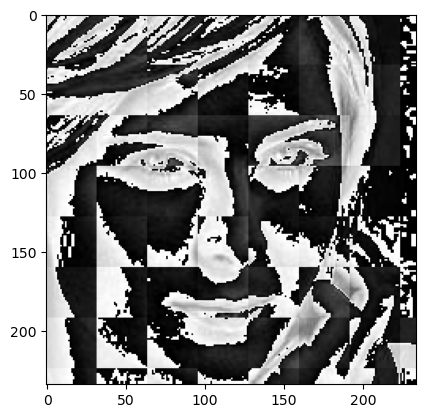

In [53]:
im_har=w2d(cropped_img,"db1",5)
plt.imshow(im_har,cmap="gray")

In [41]:
celebrity_file_names_dict

{'lionel_messi': ['lionel_messi1.png',
  'lionel_messi2.png',
  'lionel_messi3.png',
  'lionel_messi4.png',
  'lionel_messi5.png',
  'lionel_messi6.png',
  'lionel_messi7.png',
  'lionel_messi8.png',
  'lionel_messi9.png',
  'lionel_messi10.png',
  'lionel_messi11.png',
  'lionel_messi12.png',
  'lionel_messi13.png',
  'lionel_messi14.png',
  'lionel_messi15.png',
  'lionel_messi16.png',
  'lionel_messi17.png',
  'lionel_messi18.png',
  'lionel_messi19.png',
  'lionel_messi20.png',
  'lionel_messi21.png',
  'lionel_messi22.png',
  'lionel_messi23.png',
  'lionel_messi24.png',
  'lionel_messi25.png',
  'lionel_messi26.png',
  'lionel_messi27.png',
  'lionel_messi28.png',
  'lionel_messi29.png',
  'lionel_messi30.png',
  'lionel_messi31.png',
  'lionel_messi32.png',
  'lionel_messi33.png',
  'lionel_messi34.png',
  'lionel_messi35.png',
  'lionel_messi36.png',
  'lionel_messi37.png',
  'lionel_messi38.png',
  'lionel_messi39.png',
  'lionel_messi40.png',
  'lionel_messi41.png'],
 'maria_

In [42]:
class_dict={}
count=0
for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name]=count
    count+=1
class_dict

{'lionel_messi': 0,
 'maria_sharapova': 1,
 'roger_federer': 2,
 'serena_williams': 3,
 'virat_kohli': 4}

In [83]:
x,y=[],[]
for celebrity_name in celebrity_file_names_dict.keys():
    path_img=path_to_cr_data+"\\"+celebrity_name
    for training_image in os.scandir(path_img):
        img=cv2.imread(training_image.path)
        if img is None:
            continue
        scaled_raw_img=cv2.resize(img,(32,32))
        img_har=w2d(img,"db1",5)
        scaled_img_har=cv2.resize(img_har,(32,32))
        combined_img=np.vstack((scaled_raw_img.reshape(32*32*3,1),scaled_img_har.reshape(32*32,1)))
        x.append(combined_img)
        y.append(class_dict[celebrity_name])

In [84]:
len(x)

167

In [85]:
len(y)

167

In [86]:
x

[array([[ 72],
        [100],
        [114],
        ...,
        [123],
        [224],
        [226]], dtype=uint8),
 array([[ 16],
        [ 14],
        [ 15],
        ...,
        [ 81],
        [248],
        [248]], dtype=uint8),
 array([[ 24],
        [ 41],
        [ 47],
        ...,
        [ 40],
        [  8],
        [226]], dtype=uint8),
 array([[39],
        [35],
        [30],
        ...,
        [64],
        [13],
        [ 3]], dtype=uint8),
 array([[ 60],
        [ 60],
        [ 76],
        ...,
        [233],
        [236],
        [ 17]], dtype=uint8),
 array([[ 38],
        [ 35],
        [ 32],
        ...,
        [206],
        [148],
        [ 24]], dtype=uint8),
 array([[228],
        [223],
        [222],
        ...,
        [  0],
        [  0],
        [  0]], dtype=uint8),
 array([[ 33],
        [ 30],
        [ 30],
        ...,
        [ 30],
        [ 51],
        [117]], dtype=uint8),
 array([[163],
        [122],
        [  1],
        ...,
    

In [87]:
x=np.array(x).reshape(len(x),4096).astype(float)
x.shape

(167, 4096)

In [88]:
x[0]

array([ 72., 100., 114., ..., 123., 224., 226.])

# Train

In [89]:
# we will use SVM with rbf kernel tuned with heuristic finetuning
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [97]:
X_train,X_test,y_train,y_test=train_test_split(x,y,random_state=42)
pipe=Pipeline([("scaler",StandardScaler()),("svc",SVC(kernel="rbf",C=10))])
pipe.fit(X_train,y_train)
pipe.score(X_test,y_test)

0.8809523809523809

In [98]:
len(X_test)

42

In [99]:
print(classification_report(y_test,pipe.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      0.75      0.86        12
           1       0.80      1.00      0.89         8
           2       0.80      1.00      0.89         4
           3       1.00      0.75      0.86         8
           4       0.83      1.00      0.91        10

    accuracy                           0.88        42
   macro avg       0.89      0.90      0.88        42
weighted avg       0.90      0.88      0.88        42



# Lets use GridSearch cv for different models to select best model

In [108]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [117]:
model_params={
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }  
    },
    "random_forest":{
        "model":RandomForestClassifier(),
        "params":{
            "randomforestclassifier__n_estimators":[1,5,10]
        }
    },
   'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}

In [118]:
scores=[]
best_estimators={}
for algo,mp in model_params.items():
    pipe=make_pipeline(StandardScaler(),mp["model"])
    clf=GridSearchCV(pipe,mp["params"],cv=5,return_train_score=False)
    clf.fit(X_train,y_train)
    scores.append({
        "model":algo,
        "best_score":clf.best_score_,
        "best_params":clf.best_params_
    })
    best_estimators[algo]=clf.best_estimator_

NameError: name 'pd' is not defined

In [119]:
import pandas as pd
df=pd.DataFrame(scores,columns=["model","best_score","best_params"])
df

,model,best_score,best_params
0,svm,0.792,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.736,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.864,{'logisticregression__C': 1}


In [121]:
best_estimators

{'svm': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('svc',
                  SVC(C=1, gamma='auto', kernel='linear', probability=True))]),
 'random_forest': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier',
                  RandomForestClassifier(n_estimators=10))]),
 'logistic_regression': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression',
                  LogisticRegression(C=1, solver='liblinear'))])}

In [125]:
best_estimators["svm"].score(X_test,y_test)

0.9047619047619048

In [126]:
best_estimators["random_forest"].score(X_test,y_test)

0.6428571428571429

In [127]:
best_estimators["logistic_regression"].score(X_test,y_test)

0.9047619047619048

In [128]:
best_clf=best_estimators["svm"]

In [129]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,clf.predict(X_test))
cm

array([[ 9,  0,  0,  1,  2],
       [ 0,  8,  0,  0,  0],
       [ 0,  0,  4,  0,  0],
       [ 0,  1,  0,  7,  0],
       [ 0,  0,  0,  0, 10]], dtype=int64)

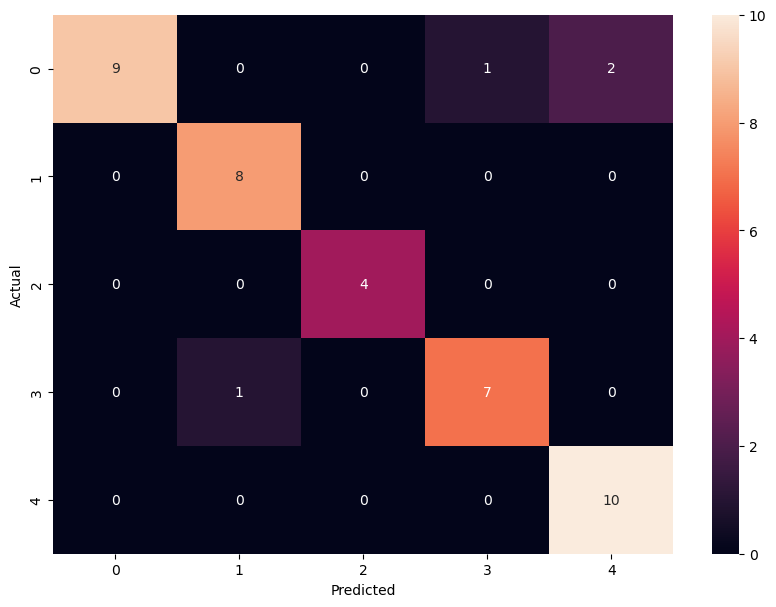

In [130]:
import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [131]:
class_dict

{'lionel_messi': 0,
 'maria_sharapova': 1,
 'roger_federer': 2,
 'serena_williams': 3,
 'virat_kohli': 4}

# Saved the trained model

In [133]:
import joblib
joblib.dump(best_clf,"saved_model.pkl")

['saved_model.pkl']

# Saved class dictionary

In [134]:
import json
with open("class_dictionary.json","w") as f:
    f.write(json.dumps(class_dict))